# Telco Customer Churn Data Explanation
## by  Mohamed Ahmed Fouad Youssef Mohamed

## Investigation Overview

In our investigation, we try to find different relationships between the Churn column and other columns. We want to know the characteristics of customers that leave the company to find solutions to make them change their minds.

## Dataset Overview

This data contains 7043 rows (customers) and 21 columns (features). 

The data set includes information about:
- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

In [66]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [67]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [68]:
# Change the data type format of the "TotalCharges" column.
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors = 'coerce')

In [69]:
# drop the missing values
df.dropna(inplace=True)
df.isnull().sum().sum()

0

In [70]:
# drop customerID
df.drop(columns = ['customerID'], inplace=True)
'customerID' in df.columns

False

In [71]:
# check if there are duplicate rows
df.duplicated().sum()

22

In [72]:
# drop duplicate rows
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7010 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7010 non-null   object 
 1   SeniorCitizen     7010 non-null   int64  
 2   Partner           7010 non-null   object 
 3   Dependents        7010 non-null   object 
 4   tenure            7010 non-null   int64  
 5   PhoneService      7010 non-null   object 
 6   MultipleLines     7010 non-null   object 
 7   InternetService   7010 non-null   object 
 8   OnlineSecurity    7010 non-null   object 
 9   OnlineBackup      7010 non-null   object 
 10  DeviceProtection  7010 non-null   object 
 11  TechSupport       7010 non-null   object 
 12  StreamingTV       7010 non-null   object 
 13  StreamingMovies   7010 non-null   object 
 14  Contract          7010 non-null   object 
 15  PaperlessBilling  7010 non-null   object 
 16  PaymentMethod     7010 non-null   object 


In [74]:
data = df[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'InternetService', 'TechSupport',
           'Contract', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']]
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,TechSupport,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,DSL,No,Month-to-month,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,DSL,No,One year,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,DSL,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,DSL,Yes,One year,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,Fiber optic,No,Month-to-month,Electronic check,70.70,151.65,Yes


In [75]:
# function to plot the distribution of categorical variable 
# since the countplot function show the counts of observations in each categorical bin using bars.
def countplot_ratio(x = None, data = None, hue = None, ax = None, order = None, autopct = None, color = None):
    plt.figure(figsize=(10, 6))
    # plot the variable
    ax = sb.countplot(x = x, data = data, hue = hue, ax = ax, color = color, order = order)
    # names of x labels
    ax.set_xticklabels(ax.get_xticklabels())
    # plot title
    ax.set_title(x + " Distribution")
    # total number of data which used to get the proportion
    total = float(len(data))
    # if autopct equal to True, It will show the proportions of the data
    if autopct == True:
        # for loop to iterate on the patches
        for patch in ax.patches:
            # get the height of the patch which represents the number of observations.
            height = patch.get_height()
            # Put text on each patch with the proportion of the observations
            ax.text(patch.get_x()+patch.get_width()/2,height+4,'{:.2f}%'.format((height/total)*100),weight = 'bold',
                fontsize = 12,ha = 'center')
            
base_color = sb.color_palette()[0]


## Churn Distribution

Data is imbalanced since customers who didn't leave in the last month represent 73.51%.

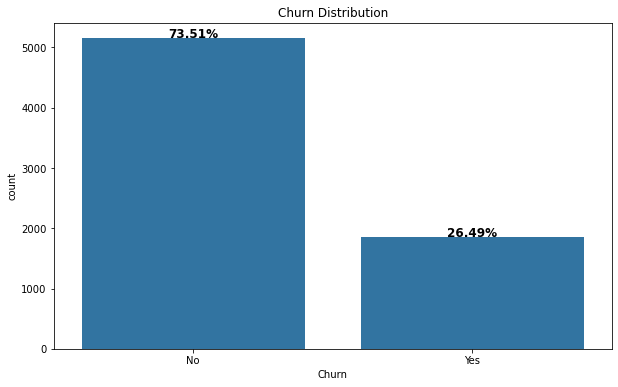

In [76]:
countplot_ratio(x = 'Churn', data=data, autopct=True, color = base_color)

## SeniorCitizen Distribution by Churn

- 64.01 % of customers are young and don't leave the company.
- 19.71 % of customers are young and leave the company.
- 9.50 % of customers are senior citizens and don't leave the company.
- 6.78% of customers are senior citizens and leave the company.
- More than half of the customers are young and don't leave the company.
- We can't say most of the customers who don't leave the company are young. This is because the data is imbalanced since the number of young customers is greater than senior citizens. If the number of young customers and senior citizens is the same, It will be a fair comparison.

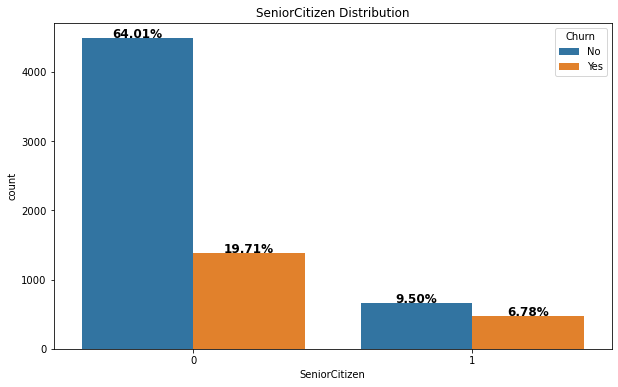

In [77]:
countplot_ratio(x = 'SeniorCitizen', data = data, hue = 'Churn', autopct=True)

## Dependents Distribution by Churn

- 48.22% of customers don't have dependents and don't leave the company.
- 21.84% of customers don't have dependents and leave the company.
- 25.29% of customers have dependents and don't leave the company.
- 4.65% of customers have dependents and leave the company.
- About half of the customers don't have dependents and don't leave the company. And this is because most of the customers are young, and young people usually don't have dependents.

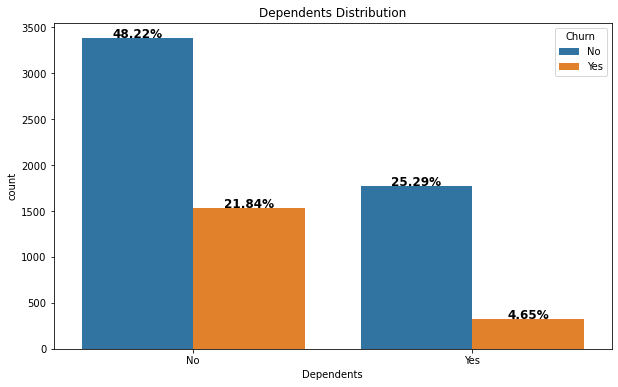

In [78]:
countplot_ratio(x = 'Dependents', data = data, hue = 'Churn', autopct=True)

## Distribution of tenure vs SeniorCitizen and Churn
- Most young customers who leave the company don't stay more than 20 months with the company. It's the same for senior citizen customers.
- Regardless of was the customer is a young or senior citizen, the customers who stayed a few months are more likely to leave the company. And the customers who stayed for more than 35 months are more likely to stay with the company.

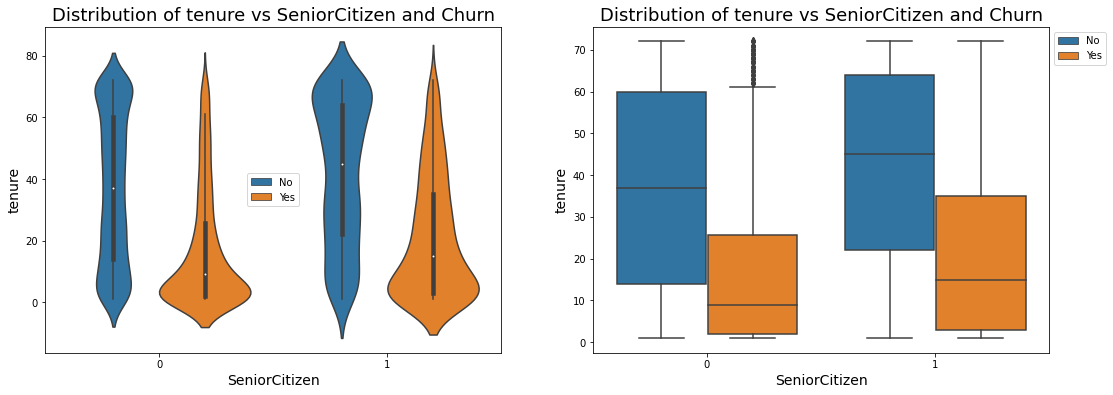

In [79]:
# Distribution of tenure vs SeniorCitizen and Churn
plt.figure(figsize = [18, 6])
plt.subplot(1, 2, 1)
sb.violinplot(data = data, x = 'SeniorCitizen', y = 'tenure', hue = 'Churn')
plt.ylabel('tenure', fontdict={'fontsize': 14})
plt.xlabel('SeniorCitizen', fontdict={'fontsize': 14})
plt.legend( loc='center')
plt.title('Distribution of tenure vs SeniorCitizen and Churn', fontdict={'fontsize': 18})

plt.subplot(1, 2, 2)
sb.boxplot(data = data, x = 'SeniorCitizen', y = 'tenure', hue = 'Churn')
plt.ylabel('tenure', fontdict={'fontsize': 14})
plt.xlabel('SeniorCitizen', fontdict={'fontsize': 14})
plt.legend(bbox_to_anchor=(1, 1), loc='best')
plt.title('Distribution of tenure vs SeniorCitizen and Churn', fontdict={'fontsize': 18});

## Distribution of tenure vs InternetService and Churn
- The customers who stayed for about 45 months on average with the company and had an internet service provider of type fiber optic are more likely to stay with the company.
- The customers who stayed for about 20 months on average with the company and had an internet service provider of type fiber optic are more likely to leave the company.

- The customers who stayed for about 15 months on average with the company and had an internet service provider of type DSL are more likely to leave the company.

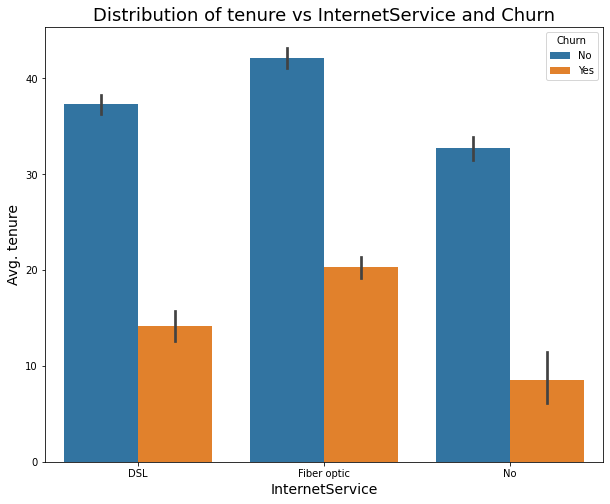

In [80]:
# Distribution of tenure vs InternetService and Churn
plt.figure(figsize=(10, 8))
sb.barplot(data = data, x = 'InternetService', y = 'tenure', hue = 'Churn')
plt.ylabel('Avg. tenure', fontdict={'fontsize': 14})
plt.xlabel('InternetService', fontdict={'fontsize': 14})
plt.title('Distribution of tenure vs InternetService and Churn', fontdict={'fontsize': 18});

In [81]:
!jupyter nbconvert slide_deck_template.ipynb --to slides --no-input --post serve

[NbConvertApp] Converting notebook slide_deck_template.ipynb to slides
[NbConvertApp] Writing 701706 bytes to slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\moham\Anaconda\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\moham\Anaconda\lib\site-packages\jupyter_core\application.py", line 254, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\moham\Anaconda\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\moham\Anaconda\lib\site-packages\nbconvert\nbconvertapp.py", line 350, in start
    self.convert_notebooks()
  File "C:\Users\moham\Anaconda\lib\site-packages\nbconvert\nbconvertapp.py", line 524, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "C:\